In [3]:
from Functions_CPTu_Cap_Copy import *

# Converting AGS data to pandas dataframe

# Link to naming convention for different data types - https://www.ags.org.uk/content/uploads/2022/02/AGS4-v-4.1.1-2022.pdf

### Naming Convention
### SCPT - Static Cone Penetration Test 

### 'SCPT_DPTH' = Depth of Results
### 'SCPT_RES' = Cone Resistance
### 'SCPT_FRES' = Local Unit Side Friction
### 'SCPT_PWP2' = Shoulder Porewater Pressure (u2)

## No data on SCPTu tests

In [4]:
### Converting AGS to python data structure

from python_ags4 import AGS4
import numpy as np
import pandas as pd

file_path = 'A1B2CH_Confidential.txt'

tables, headings = AGS4.AGS4_to_dataframe(file_path)

SCPT = AGS4.convert_to_numeric(tables['SCPT'])
# print(SCPT)


In [5]:
### Extracting specific parameters from python data for CPTs 
import matplotlib.pyplot as plt

grouped_data = SCPT.groupby(SCPT.columns[1])

All_depths = []
All_qcs = []
All_SF = [] # All Skin Friction values
All_f_pwp = []

for name, group in grouped_data:
    depth = group['SCPT_DPTH']  
    qc = group['SCPT_RES']  
    sf = group['SCPT_FRES']
    f_pwp = group['SCPT_PWP2']
    
    All_depths.append(depth)
    All_qcs.append(qc)
    All_SF.append(sf)
    All_f_pwp.append(f_pwp)
    
#     print(np.shape(depth))
    
# print(np.shape(depth))

<Figure size 2000x2000 with 0 Axes>

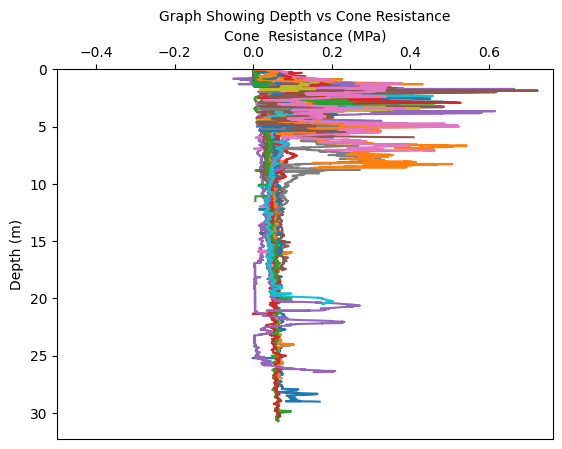

In [6]:
### PLotting graph

plt.figure(figsize=(20, 20))

fig, ax = plt.subplots()
ax.xaxis.tick_top()  # Place x-axis ticks at the top
ax.yaxis.tick_left()  # Place y-axis ticks on the left
ax.xaxis.set_label_position('top')  # Place x-axis label at the top
ax.yaxis.set_label_position('left')  # Place y-axis label on
ax.invert_yaxis()

for i in range(len(All_SF)):
#     fig, ax = plt.subplots()

#     ax.xaxis.tick_top()  # Place x-axis ticks at the top
#     ax.yaxis.tick_left()  # Place y-axis ticks on the left
#     ax.xaxis.set_label_position('top')  # Place x-axis label at the top
#     ax.yaxis.set_label_position('left')  # Place y-axis label on
#     ax.invert_yaxis()
    
    plt.plot(  All_SF[i], All_depths[i], label=f'Cone Resistance BH{i+1}')
    
#     plt.plot( All_f_pwp[i], All_depths[i], label=f'Face Pwp BH{i+1}')
#     plt.legend()



# Add labels and title
plt.ylabel('Depth (m)')
plt.xlabel('Cone  Resistance (MPa)')
plt.title('Graph Showing Depth vs Cone Resistance', fontsize=10)

plt.xlim(left=-0.5)
plt.ylim(top=0)

# Add legend
# plt.legend()

# Show the plot
plt.show()

fig.savefig('Plot_of_initial_borehole_data.png', dpi=300)

# Cleaning of Data - CPT

### Several simple steps are carried out
### 1. Removing data points with less than 10% of average values - maybe find paper on this

1057.3333333333333


<Figure size 2000x1000 with 0 Axes>

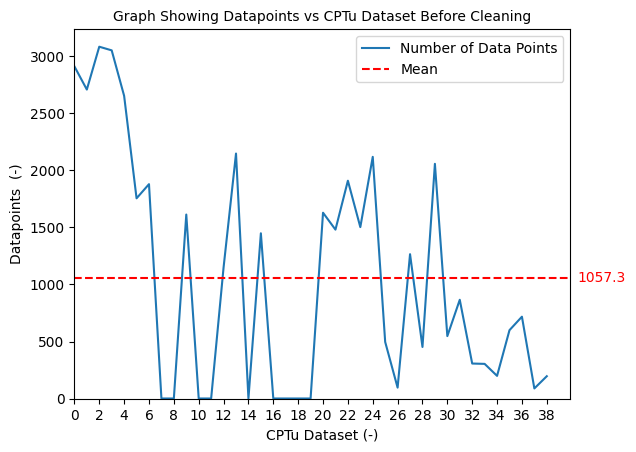

In [7]:
### Checking length of each Data Set - Before Cleaning

### cReating function for average data points
def avrg_DP(input):
    data_length =[]
    Count = []
    
    for i in range(len(input)):
        data_length.append(len(input[i]))
        Count.append(i)
        
    count_calc = len(Count)
    sum_calc = sum(data_length)
    
    avrg_count = sum_calc / count_calc
    
    return Count, avrg_count, data_length



### Assigning new count values
Count = avrg_DP(All_depths)[0]
avrg_count_orig = avrg_DP(All_depths)[1]
DL = avrg_DP(All_depths)[2]

print(avrg_count_orig)


### PLotting graph
plt.figure(figsize=(20, 10))

fig, ax = plt.subplots()
ax.xaxis.tick_bottom()  # Place x-axis ticks at the top
ax.yaxis.tick_left()  # Place y-axis ticks on the left
ax.xaxis.set_label_position('bottom')  # Place x-axis label at the top
ax.yaxis.set_label_position('left')  # Place y-axis label on
# ax.invert_yaxis()

plt.plot(  Count, DL, label='Number of Data Points')
plt.axhline(avrg_count_orig, color='r', linestyle='--', label='Mean')
    

# Add labels and title
plt.ylabel('Datapoints  (-)')
plt.xlabel('CPTu Dataset (-)')
plt.title('Graph Showing Datapoints vs CPTu Dataset Before Cleaning', fontsize=10)

plt.text(Count[-1] + 2.5, avrg_count_orig, f'{round(avrg_count_orig, 1)}', verticalalignment='center', color='red')


plt.xticks(range(0, len(Count), 2))    

plt.xlim(left=0)
plt.ylim(bottom=0)

plt.legend()
# Show the plot
plt.show()
fig.savefig('Plot_of_CPTu_datapoints_before_cleaning.png', dpi=300)
# fig.savefig('Plot_of_number_of_datapoints_for_each_borehole.png', dpi=300)


### All Cleaning just done on the length of a list

### Actual values of list are irrelevent

529.0
22
1775.9545454545455


<Figure size 2000x1000 with 0 Axes>

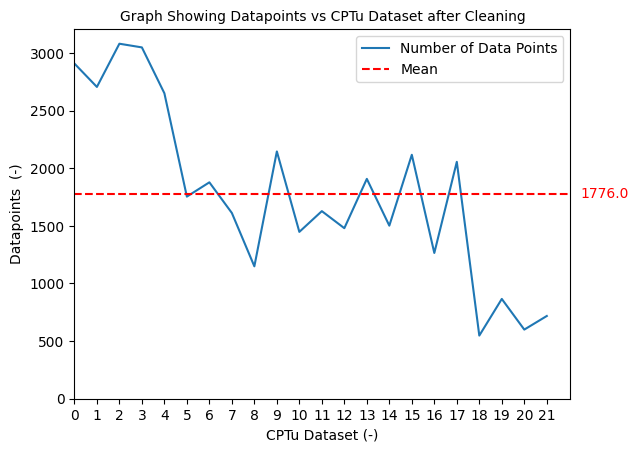

In [8]:
### Cleaning Datasets
Threshold_Percentage = 50 ### Percentage of existing average to remove values if they are below

def filter_sublists(list_of_lists, threshold): 
    filtered_list_of_lists = [sublist for sublist in list_of_lists if len(sublist) > threshold]
    return filtered_list_of_lists

Threshold = round( (Threshold_Percentage/100) * avrg_count_orig, 0)
print(Threshold)


### Applying cleaning of data
All_depths_c1 = (filter_sublists(All_depths, Threshold))
All_SF_c1 = (filter_sublists(All_SF, Threshold))
All_qcs_c1 = (filter_sublists(All_qcs, Threshold))
All_f_pwp_c1 = (filter_sublists(All_f_pwp, Threshold))

print(len(All_depths_c1))


### Assigning values from DP function
Count = avrg_DP(All_depths_c1)[0]
avrg_count = avrg_DP(All_depths_c1)[1]
DL = avrg_DP(All_depths_c1)[2]

print(avrg_count)

### PLotting graph
plt.figure(figsize=(20, 10))

fig, ax = plt.subplots()
ax.xaxis.tick_bottom()  # Place x-axis ticks at the top
ax.yaxis.tick_left()  # Place y-axis ticks on the left
ax.xaxis.set_label_position('bottom')  # Place x-axis label at the top
ax.yaxis.set_label_position('left')  # Place y-axis label on
# ax.invert_yaxis()

plt.plot(  Count, DL, label='Number of Data Points')
plt.axhline(avrg_count, color='r', linestyle='--', label='Mean')

plt.text(Count[-1] + 1.5, avrg_count, f'{round(avrg_count, 1)}', verticalalignment='center', color='red')


plt.xticks(range(0, len(Count), 1))    
    

# Add labels and title
plt.ylabel('Datapoints  (-)')
plt.xlabel('CPTu Dataset (-)')
plt.title('Graph Showing Datapoints vs CPTu Dataset after Cleaning', fontsize=10)

plt.xlim(left=0)
plt.ylim(bottom=0)

plt.legend(loc='upper right')
# Show the plot
plt.show()
fig.savefig('Plot_of_CPTu_datapoints_after_cleaning.png', dpi=300)


### Plotting graph of Cleaned Data

<Figure size 2000x2000 with 0 Axes>

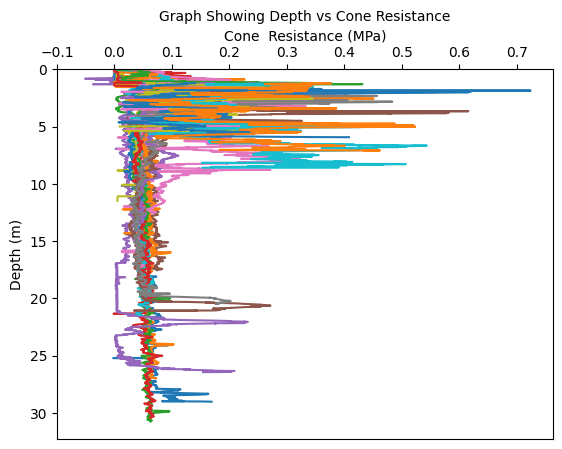

Length of Cleaned Dataset =  22


In [9]:
### PLotting Graph of Cleaned Data

plt.figure(figsize=(20, 20))

fig, ax = plt.subplots()
ax.xaxis.tick_top()  # Place x-axis ticks at the top
ax.yaxis.tick_left()  # Place y-axis ticks on the left
ax.xaxis.set_label_position('top')  # Place x-axis label at the top
ax.yaxis.set_label_position('left')  # Place y-axis label on
ax.invert_yaxis()

for i in range(len(All_SF_c1)):
#     fig, ax = plt.subplots()

#     ax.xaxis.tick_top()  # Place x-axis ticks at the top
#     ax.yaxis.tick_left()  # Place y-axis ticks on the left
#     ax.xaxis.set_label_position('top')  # Place x-axis label at the top
#     ax.yaxis.set_label_position('left')  # Place y-axis label on
#     ax.invert_yaxis()
    
    plt.plot(  All_SF_c1[i], All_depths_c1[i], label=f'Cone Resistance BH{i+1}')
    
#     plt.plot( All_f_pwp[i], All_depths[i], label=f'Face Pwp BH{i+1}')
#     plt.legend()

# Add labels and title
plt.ylabel('Depth (m)')
plt.xlabel('Cone  Resistance (MPa)')
plt.title('Graph Showing Depth vs Cone Resistance', fontsize=10)

plt.xlim(left=-0.1)
plt.ylim(top=0)

# Add legend
# plt.legend()

# Show the plot
plt.show()

# fig.savefig('Plot_of_initial_borehole_data.png', dpi=300)



print('Length of Cleaned Dataset = ', len(All_depths_c1))

## Adding Function to Replace 'NaN' Values

In [10]:
def replace_nan_with_zero_in_series(dataset):
    # Iterate over each Series in the dataset list
    for i in range(len(dataset)):
        # Replace 'nan' string with 0 using pandas methods in the Series
        dataset[i] = dataset[i].fillna(0)
        # If you have actual NaN values (np.nan), use the following line instead
        # dataset[i] = dataset[i].fillna(0)
    return dataset

# Example usage:
All_depths_c2 = replace_nan_with_zero_in_series(All_depths_c1)
All_qcs_c2 = replace_nan_with_zero_in_series(All_qcs_c1)
All_SF_c2 = replace_nan_with_zero_in_series(All_SF_c1)
All_f_pwp_c2 = replace_nan_with_zero_in_series(All_f_pwp_c1)


# print(All_qcs_c1[15])
# print(All_qcs_c2[15])


print(len(All_qcs_c2[0]), len(All_SF_c2[1]), len(All_f_pwp_c2[3]))
print(type(All_qcs_c2[0]))
print(type(All_depths_c2))

2909 2706 3049
<class 'pandas.core.series.Series'>
<class 'list'>


## Saving Data to CSV File

In [13]:
# import pandas as pd
# 
# # Combining and saving All_depths_c2
# depths_df = pd.concat(All_depths_c2, axis=1)
# depths_df.columns = [f'Borehole_{i+1}_depth' for i in range(len(All_depths_c2))]
# depths_df.to_csv('Combined_All_depths_c2.csv', index=False)
# 
# # Combining and saving All_qcs_c2
# qcs_df = pd.concat(All_qcs_c2, axis=1)
# qcs_df.columns = [f'Borehole_{i+1}_qcs' for i in range(len(All_qcs_c2))]
# qcs_df.to_csv('Combined_All_qcs_c2.csv', index=False)
# 
# # Combining and saving All_SF_c2
# sf_df = pd.concat(All_SF_c2, axis=1)
# sf_df.columns = [f'Borehole_{i+1}_SF' for i in range(len(All_SF_c2))]
# sf_df.to_csv('Combined_All_SF_c2.csv', index=False)
# 

import numpy as np

print(len(All_f_pwp_c2))
print(type(All_f_pwp_c2[0]))

# # Combining and saving All_f_pwp_c2
# f_pwp_df = pd.concat(All_f_pwp_c2, axis=1)
# f_pwp_df.columns = [f'Borehole_{i+1}_f_pwp' for i in range(len(All_f_pwp_c2))]
# # f_pwp_df.to_csv('Combined_All_f_pwp_c2.csv', index=False)


22
<class 'pandas.core.series.Series'>


## Adding unpadded data to .csv files

In [16]:
import pandas as pd


reset_series = [series.reset_index(drop=True) for series in All_qcs_c2]

# Create a DataFrame from the list of reset Series
df = pd.concat(reset_series, axis=1)

# Optionally, you can set custom column names if needed
column_names = [f"Column_{i+1}" for i in range(len(All_qcs_c2))]
df.columns = column_names

# Write the DataFrame to a CSV file
df.to_csv("Stage_0_raw_qc_values.csv", index=False)  # 'index=False' to avoid writing row indices in the CSV file


## Final Stage of CPTu data prep - saving data to CSV Files

In [ ]:
# # print(type(All_depths_c2[15]))
# 
# sublist_index = 15  # Targeting the 16th list due to 0-based indexing
# 
# # Remove the last element from each Series object within the specified sublist
# for series in [All_depths_c2, All_SF_c2, All_qcs_c2, All_f_pwp_c2]:
#     series[sublist_index] = series[sublist_index].drop(series[sublist_index].index[-1])
# 
# # print(type(All_depths_c2))
# # print(len(All_depths_c2))
# # 
# # print(All_depths_c2)
# 
# ## padding data to length 3081 with zeros
# # Define the pad_sublists function
# def pad_sublists(sublist):
#     max_list_length = 3081
#     # Convert Series to list if needed
#     if isinstance(sublist, pd.Series):
#         sublist = sublist.tolist()
#     # Pad the list if it is shorter than the required length
#     if len(sublist) < max_list_length:
#         sublist += [0] * (max_list_length - len(sublist))
#     return sublist[:max_list_length]
# 
# 
# # Apply padding to all sublists within each Series object
# All_depths_c2_padded = [pad_sublists(sublist) for sublist in All_depths_c2]
# All_SF_c2_padded = [pad_sublists(sublist) for sublist in All_SF_c2]
# All_qcs_c2_padded = [pad_sublists(sublist) for sublist in All_qcs_c2]
# All_f_pwp_c2_padded = [pad_sublists(sublist) for sublist in All_f_pwp_c2]
# 
# 
# # print(type(All_depths_c2_padded[9]))
# # print(np.shape(All_f_pwp_c2_padded))
# 
# 
# 
# ### Splitting into training, validating and testing sets 
# training_set = split_sublists(All_depths_c2_padded, All_SF_c2_padded, All_qcs_c2_padded, All_f_pwp_c2_padded)[2]
# Validating_set = split_sublists(All_depths_c2_padded, All_SF_c2_padded, All_qcs_c2_padded, All_f_pwp_c2_padded)[1]
# Testing_set = split_sublists(All_depths_c2_padded, All_SF_c2_padded, All_qcs_c2_padded, All_f_pwp_c2_padded)[0]
# 
# # print((Testing_set[2]))
# # print(len(Testing_set[2][0]))
# # print(len(training_set[0][0]))
# # print(type(training_set[0][0]))
# 
# 
# 
# import pandas as pd
# # Create a dictionary mapping names to the datasets
# datasets = {
#     'CPTu_train_set': training_set,
#     'CPTu_val_set': Validating_set,
#     'CPTu_test_set': Testing_set
# }
# 
# def prepare_and_save_csv(data, file_name):
#     # Initialize an empty DataFrame
#     df = pd.DataFrame()
#     
#     # Process each borehole's data
#     for i, borehole in enumerate(data.values(), 1):
#         print(f"Processing Borehole {i} for {file_name}")  # Debug print
#         print("Data types:", type(borehole[0]), type(borehole[1]), type(borehole[2]), type(borehole[3]))  # Check types
#         print("Data lengths:", len(borehole[0]), len(borehole[1]), len(borehole[2]), len(borehole[3]))  # Check lengths
# 
#         # For each borehole, append each parameter's data as a new column
#         df[f'depth{i}'] = borehole[0]  # Assuming 0th tuple is depth
#         df[f'sf{i}'] = borehole[1]     # Assuming 1st tuple is sf
#         df[f'qc{i}'] = borehole[2]     # Assuming 2nd tuple is qc
#         df[f'pwp{i}'] = borehole[3]    # Assuming 3rd tuple is pwp
#     
#     # Save to CSV
#     df.to_csv(f"{file_name}.csv", index=False)
# 
# 
# # Iterate over each dataset and save them
# for file_name, data in datasets.items():
#     prepare_and_save_csv(data, file_name)
# 
# 
# 
# 
# 
# 
# 
# # print(len_avrg(training_set))
# # print(len_avrg(Validating_set))
# # print(len_avrg(Testing_set))
# 
# # print(All_depths_c1_list[1][1] - All_depths_c1_list[1][0])
# ### Might need to check if the pwp values are valid